In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Paths

In [11]:
survey_response = "/home/nikhil/projects/neuroinformatics_tools/ecr-fair/survey/openpub_survey_response.csv"

### Load data

In [12]:
survey_df = pd.read_csv(survey_response)
n_respondents = survey_df.shape[0]
print(f"Number of respondents: {n_respondents}")
survey_df.head()

Number of respondents: 42


,Timestamp,Where do you locate yourself on science-time continuum?,Which of these research domains you primarily work in?,"Which of these tasks take the biggest chunk out of your work, day to day? \n\nPlease rank these tasks from 1 (most time consuming) to 7 (least time consuming) [Data collection / capture]","Which of these tasks take the biggest chunk out of your work, day to day? \n\nPlease rank these tasks from 1 (most time consuming) to 7 (least time consuming) [Data curation / organization]","Which of these tasks take the biggest chunk out of your work, day to day? \n\nPlease rank these tasks from 1 (most time consuming) to 7 (least time consuming) [Data processing ]","Which of these tasks take the biggest chunk out of your work, day to day? \n\nPlease rank these tasks from 1 (most time consuming) to 7 (least time consuming) [Data maintainance and access control]","Which of these tasks take the biggest chunk out of your work, day to day? \n\nPlease rank these tasks from 1 (most time consuming) to 7 (least time consuming) [Quality control]","Which of these tasks take the biggest chunk out of your work, day to day? \n\nPlease rank these tasks from 1 (most time consuming) to 7 (least time consuming) [Data annotation ]","Which of these tasks take the biggest chunk out of your work, day to day? \n\nPlease rank these tasks from 1 (most time consuming) to 7 (least time consuming) [Data publication]",...,"Data dictionaries help with reuse of research objects. In your own work, what documentation practices do you use? [lab-notebooks]","Data dictionaries help with reuse of research objects. In your own work, what documentation practices do you use? [Web Markdown tools (e.g. MkDocs, Read the Docs)]","If there are any ""Other"" standards, tools, platforms, documentation practices that you use - please specify them here.",Which of these data-annotation and harmonization resources are you aware of?,"In your view, what would encourage researchers to invest time and resources to improve reproducibility of their work ?",email (optional),"Your academic affiliation - institute, center, university etc. (Optional)",Gender,Location of your academic institute \n(Just specify the country),"Any other thoughts, suggestions, memes you would like to share! \n(For example: the chaos prediction and a phd comic)"
0,11/6/2023 14:59:42,A (cautiously optimistic) graduate student,"Functional MR imaging, Clinical / behavior ass...",7,4,1,5,3,6,2,...,regular user,"aware, but not tried",NaN,"Neurobagel, NIDM","Better neuroinformatic tools, Better training ...",NaN,NaN,Female,France,NaN
1,11/6/2023 22:35:51,A (cautiously optimistic) graduate student,"Functional MR imaging, EEG",2,3,1,6,4,7,5,...,regular user,never heard,NaN,Neurobagel,"Dedicated funding, Specialized academic positi...",NaN,McGill University,Male,Canada,NaN
2,11/7/2023 8:51:35,A (practical) Early Career Researcher i.e. <= ...,"Structural MR imaging, Functional MR imaging",1,3,5,4,7,6,2,...,never heard,never heard,NeuroVault,NaN,NaN,NaN,NaN,Female,Germany,NaN
3,11/7/2023 9:39:45,A (practical) Early Career Researcher i.e. <= ...,"Structural MR imaging, Functional MR imaging",3,2,1,4,7,5,6,...,regular user,not applicable to my work,NaN,Neurobagel,Specialized academic positions (e.g. data mana...,NaN,NaN,Male,Canada,NaN
4,11/7/2023 9:48:46,A (practical) Early Career Researcher i.e. <= ...,EEG,7,5,6,3,4,1,2,...,occasional,never heard,NaN,NaN,"Dedicated funding, Specialized academic positi...",NaN,NaN,Female,Netherlands,I really think a lack of time/funding is one o...


### Palettes

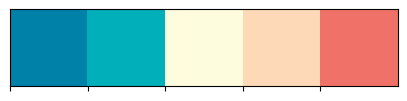

In [13]:
coolwarm_5 = ["#0081a7", "#00afb9", "#fdfcdc", "#fed9b7", "#f07167"]
sns.palettes.color_palette(coolwarm_5)
sns.palplot(coolwarm_5)

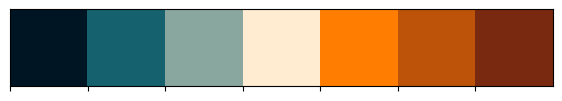

In [14]:
coolwarm_7= ["#001524","#15616d","#8aa79f","#ffecd1","#ff7d00","#bc5308","#78290f"]
sns.palettes.color_palette(coolwarm_7)
sns.palplot(coolwarm_7)

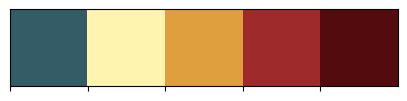

In [15]:
cat_1 = ["#335c67","#fff3b0","#e09f3e","#9e2a2b","#540b0e"]
sns.palettes.color_palette(cat_1)
sns.palplot(cat_1)

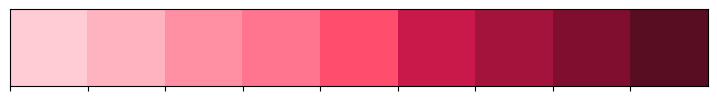

In [16]:
reds = ["#590d22","#800f2f","#a4133c","#c9184a","#ff4d6d","#ff758f","#ff8fa3","#ffb3c1","#ffccd5"]
reds = reds[::-1]
sns.palettes.color_palette(reds)
sns.palplot(reds)

### Daily difficulties

In [17]:
daily_tasks_cols = survey_df.columns[3:10]

plot_df = survey_df[daily_tasks_cols].copy()

plot_df = plot_df.rename(columns={daily_tasks_cols[0]   : "capture",
                                    daily_tasks_cols[1] : "organization",
                                    daily_tasks_cols[2] : "processing",
                                    daily_tasks_cols[3] : "maintenance",
                                    daily_tasks_cols[4] : "QC",
                                    daily_tasks_cols[5] : "annotation",
                                    daily_tasks_cols[6] : "publication"})

plot_counts = plot_df.apply(pd.value_counts).fillna(0)
plot_counts["time_burden"] = ["most", "high", "above-avg", "average", "below-avg", "low", "least"]
plot_counts = plot_counts.set_index("time_burden")
plot_counts

,capture,organization,processing,maintenance,QC,annotation,publication
time_burden,,,,,,,
most,13.0,6,14,0.0,1,5,3
high,5.0,8,5,7.0,7,3,7
above-avg,5.0,11,6,5.0,7,4,4
average,0.0,4,4,10.0,14,5,5
below-avg,3.0,9,5,6.0,7,10,2
low,5.0,3,5,6.0,2,7,14
least,11.0,1,3,8.0,4,8,7


[Text(0.5, 0, 'most'),
 Text(1.5, 0, 'high'),
 Text(2.5, 0, 'above-avg'),
 Text(3.5, 0, 'average'),
 Text(4.5, 0, 'below-avg'),
 Text(5.5, 0, 'low'),
 Text(6.5, 0, 'least')]

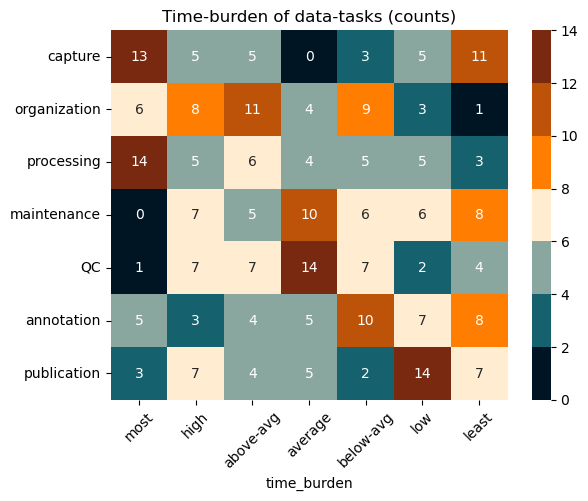

In [18]:
g = sns.heatmap(plot_counts.T, annot=True, cmap=coolwarm_7, cbar=True)
g.set_title("Time-burden of data-tasks (counts)")
g.set_xticklabels(g.get_xticklabels(), rotation=45)


### FAIR experience

In [76]:
fair_cols = survey_df.columns[12:16]
plot_df = survey_df[fair_cols].copy()

plot_df = plot_df.rename(columns={fair_cols[0]   : "Findability",
                                    fair_cols[1] : "Accessibility",
                                    fair_cols[2] : "Interoperability",
                                    fair_cols[3] : "Reusability"})


plot_df.head()


,Findability,Accessibility,Interoperability,Reusability
0,The dataset was published online and could be ...,Needed to create user account (e.g. LONI or NI...,A data dictionary/codebook with non-standard d...,The dataset had a permissive license and/or da...
1,The dataset was published online and could be ...,Needed to create user account (e.g. LONI or NI...,A data dictionary/codebook using a standard vo...,The dataset was organized according to a commu...
2,The dataset’s existence could only be known th...,"Data were available ""upon request"" to the orig...",Author provided short info about variables,There was enough information about how the dat...
3,The dataset was published online and could be ...,Needed to create user account (e.g. LONI or NI...,A data dictionary/codebook with non-standard d...,There was enough information about how the dat...
4,The dataset was published online and could be ...,Data were readily downloadable with one or two...,A data dictionary/codebook with non-standard d...,There was enough information about how the dat...


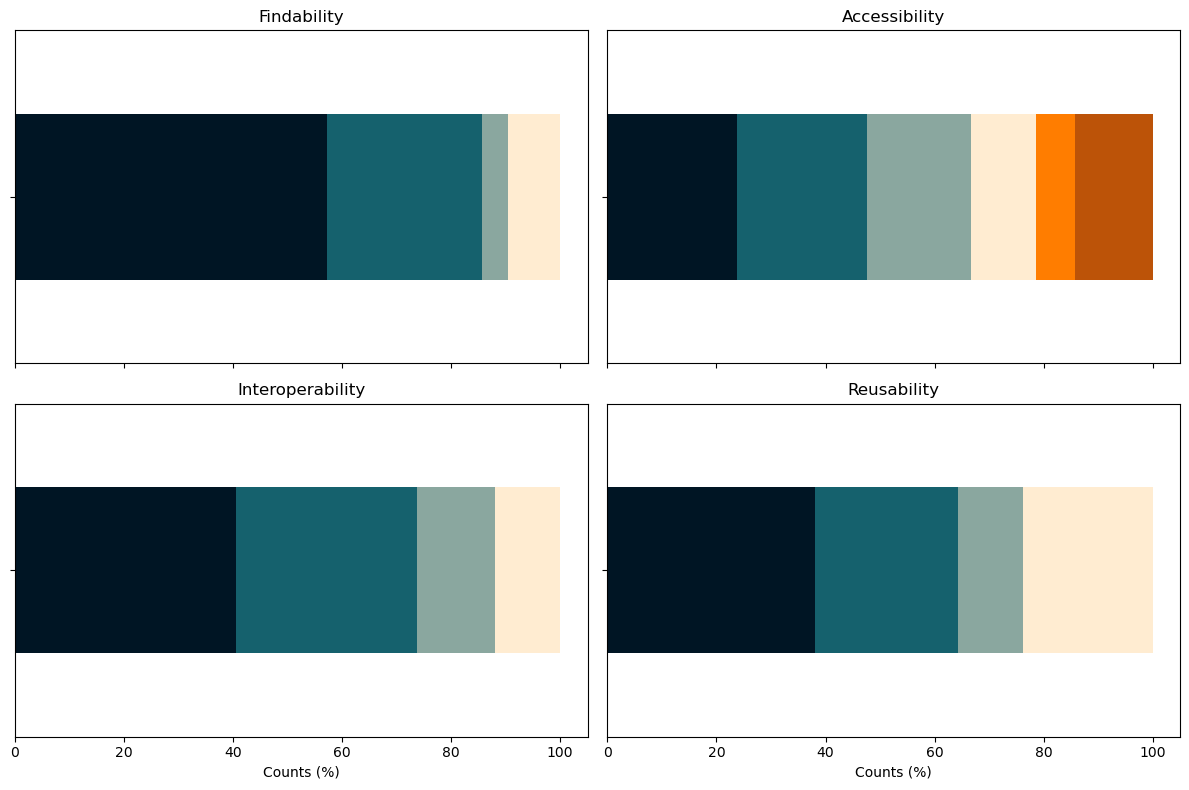

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

for i, col in enumerate(plot_df.columns):
    ax = axes.flatten()[i]
    
    if col == "Reusability":
        plot_df["Reusability"] = plot_df["Reusability"].str.split(",")
        plot_df["Reusability"] = plot_df["Reusability"].explode("Reusability").str.strip()

    col_df = plot_df[col].copy()
    
    plot_counts = col_df.value_counts().to_frame().T.copy()
    plot_counts = plot_counts[plot_counts > 1].dropna(axis=1)
    if col == "Reusability":
        plot_counts["The dataset was too messy for reuse in reasonable timeframe"] = n_respondents - plot_counts.sum(axis=1).values[0]
    else:
        plot_counts["Other"] = n_respondents - plot_counts.sum(axis=1).values[0]

    plot_counts_percent = plot_counts / n_respondents * 100
    plot_counts_percent.plot(kind="barh", stacked=True, color=coolwarm_7, legend=False, ax=ax)
    # ax.legend(title=col, loc="upper right", bbox_to_anchor=(-.02, 1))
    ax.set_title(col)
    # ax.set_xticklabels("")
    ax.set_yticklabels("")
    ax.set_xlabel("Counts (%)")
plt.tight_layout()

In [75]:
plot_df[col].value_counts()

There was enough information about how the data was collected so that an independent group could reproduce the original experiment    16
The dataset had a permissive license and/or data usage agreement                                                                      11
The dataset was organized according to a community standard                                                                            5
not sure about the license                                                                                                             1
i just used it to do some simulations                                                                                                  1
but ended up dropping them as i changed the model                                                                                      1
Data rarely set up in a way that would allow reproducibility                                                                           1
It was a mess. Was able to work only with

### Fairnes of my data

In [154]:
self_fair_cols = survey_df.columns[16:24]

plot_df = survey_df[self_fair_cols].copy()

plot_df = plot_df.rename(columns={self_fair_cols[0]   : "F1",
                                    self_fair_cols[1] : "F2",
                                    self_fair_cols[2] : "A1",
                                    self_fair_cols[3] : "A2",
                                    self_fair_cols[4] : "I1",
                                    self_fair_cols[5] : "I2",
                                    self_fair_cols[6] : "R1",
                                    self_fair_cols[7] : "R2"})


plot_counts = plot_df.apply(pd.value_counts).fillna(0)
plot_counts["FAIRness"] = ["very poor","poor","below avg","above avg","good","excellent"] +  ["not sure"]
plot_counts = plot_counts.set_index("FAIRness")
plot_counts

,F1,F2,A1,A2,I1,I2,R1,R2
FAIRness,,,,,,,,
very poor,2,1,5,11,3,2,8,7
poor,1,7,3,4,3,8,3,5
below avg,4,8,4,6,5,3,5,4
above avg,4,7,4,6,3,6,5,4
good,10,10,9,4,7,6,4,4
excellent,14,5,13,6,9,13,13,6
not sure,6,3,3,4,11,2,3,10


[Text(0.5, 0, 'very poor'),
 Text(1.5, 0, 'poor'),
 Text(2.5, 0, 'below avg'),
 Text(3.5, 0, 'above avg'),
 Text(4.5, 0, 'good'),
 Text(5.5, 0, 'excellent'),
 Text(6.5, 0, 'not sure')]

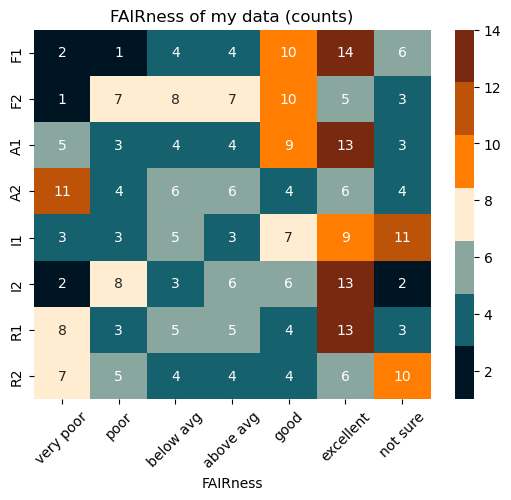

In [156]:
g = sns.heatmap(plot_counts.T, annot=True, cmap=coolwarm_7, cbar=True)
g.set_title("FAIRness of my data (counts)")
g.set_xticklabels(g.get_xticklabels(), rotation=45)


### reproducibility timeframe

In [188]:
repro_cols = survey_df.columns[24:27]
plot_df = survey_df[repro_cols].copy()
time_dict = {"< 1 week": 1,
            "1 week - 1 month": 2,
            "1 month - 6 months": 3,
            ">  6 months": 4}

plot_df = plot_df.replace(time_dict)
plot_df.head()

,"Based on your own experience, \nhow long would it take for:\n\nNote: ""work"" includes {data processing + analysis} but NOT data collection duration.\n [you to reproduce your work from last year?]","Based on your own experience, \nhow long would it take for:\n\nNote: ""work"" includes {data processing + analysis} but NOT data collection duration.\n [you to reproduce someone else's work that you have cited in your papers / presentations?]","Based on your own experience, \nhow long would it take for:\n\nNote: ""work"" includes {data processing + analysis} but NOT data collection duration.\n [someone else to reproduce your most impactful work that has been published (including preprints)?]"
0,2,3,2
1,1,2,2
2,1,3,2
3,1,3,3
4,1,3,1


[Text(0, 1, '< 1 week'),
 Text(0, 2, '1 week - 1 month'),
 Text(0, 3, '1 month - 6 months'),
 Text(0, 4, '>  6 months')]

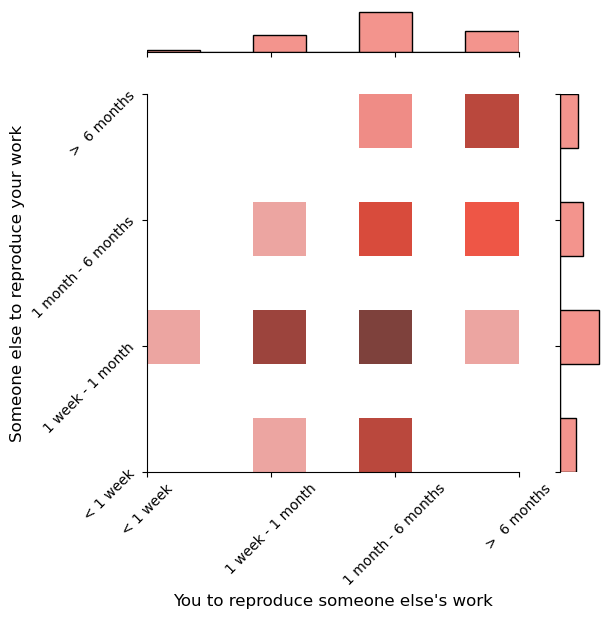

In [215]:
# plt.plot(plot_df[repro_cols[1]],plot_df[repro_cols[2]], "o", jitter=True)
g = sns.jointplot(x=plot_df[repro_cols[1]], y=plot_df[repro_cols[2]], 
                  kind="hist", color=coolwarm_5[-1], space=1,
                  height=6, xlim=(1, 4), ylim=(1, 4))
g.set_axis_labels("You to reproduce someone else's work","Someone else to reproduce your work", fontsize=12)

g.ax_joint.set_xticks(range(1, 5))
g.ax_joint.set_xticklabels(time_dict.keys(), rotation=45)
g.ax_joint.set_yticks(range(1, 5))
g.ax_joint.set_yticklabels(time_dict.keys(), rotation=45)


### Challenges in rerpoducibility

In [220]:
challenge_cols = survey_df.columns[28:33]
challenge_cols

Index(['What makes it hard to implement reproducible workflows?\n\nPlease rank these tasks from 1 (most difficult / time consuming) to 5 (least time consuming) [Difficulty in "finding" details on data, processing steps, quality checks]',
       'What makes it hard to implement reproducible workflows?\n\nPlease rank these tasks from 1 (most difficult / time consuming) to 5 (least time consuming) [Getting "access" to data (raw or processed) and code]',
       'What makes it hard to implement reproducible workflows?\n\nPlease rank these tasks from 1 (most difficult / time consuming) to 5 (least time consuming) [Poor "interoperability" of metadata / data dictionaries (e.g. confusing column names) and portability of code]',
       'What makes it hard to implement reproducible workflows?\n\nPlease rank these tasks from 1 (most difficult / time consuming) to 5 (least time consuming) [Challenging "reusability" of data due to privacy constraints and/or insufficient provenance information]',
   

In [221]:
plot_df = survey_df[challenge_cols].copy()

plot_df = plot_df.rename(columns={challenge_cols[0]   : "Finding data details",
                                    challenge_cols[1] : "Accessing data",
                                    challenge_cols[2] : "Interoperability of metadata",
                                    challenge_cols[3] : "Reusability issues (e.g. privacy/provenence)",
                                    challenge_cols[4] : "Lack of academic incentives"})                            


plot_counts = plot_df.apply(pd.value_counts).fillna(0)
plot_counts["difficulty/time burden"] = ["very high","high","average","low","very low"] 
plot_counts = plot_counts.set_index("difficulty/time burden")
plot_counts

,Findability,Accessibility,Interoperability,Reusability,Academic incentive
difficulty/time burden,,,,,
very high,18,6,6,4,8
high,8,13,11,7,3
average,7,12,11,5,7
low,5,8,12,11,6
very low,4,3,2,15,18


[Text(0.5, 0, 'very high'),
 Text(1.5, 0, 'high'),
 Text(2.5, 0, 'average'),
 Text(3.5, 0, 'low'),
 Text(4.5, 0, 'very low')]

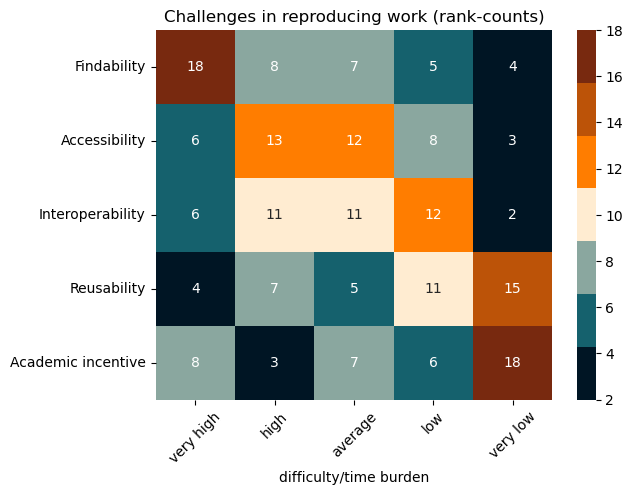

In [224]:
g = sns.heatmap(plot_counts.T, annot=True, cmap=coolwarm_7, cbar=True)
g.set_title("Challenges in reproducing work (rank-counts)")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
